<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning.</p>


### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [19]:
import pandas as pd 
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

dados = pd.read_csv("C:/Users/JOHGNATAN/OneDrive/Área de Trabalho/Python_Data_Science/base_de_dados_diversos/HousePrices_HalfMil.csv", 
                   sep =';')
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [20]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>



In [21]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

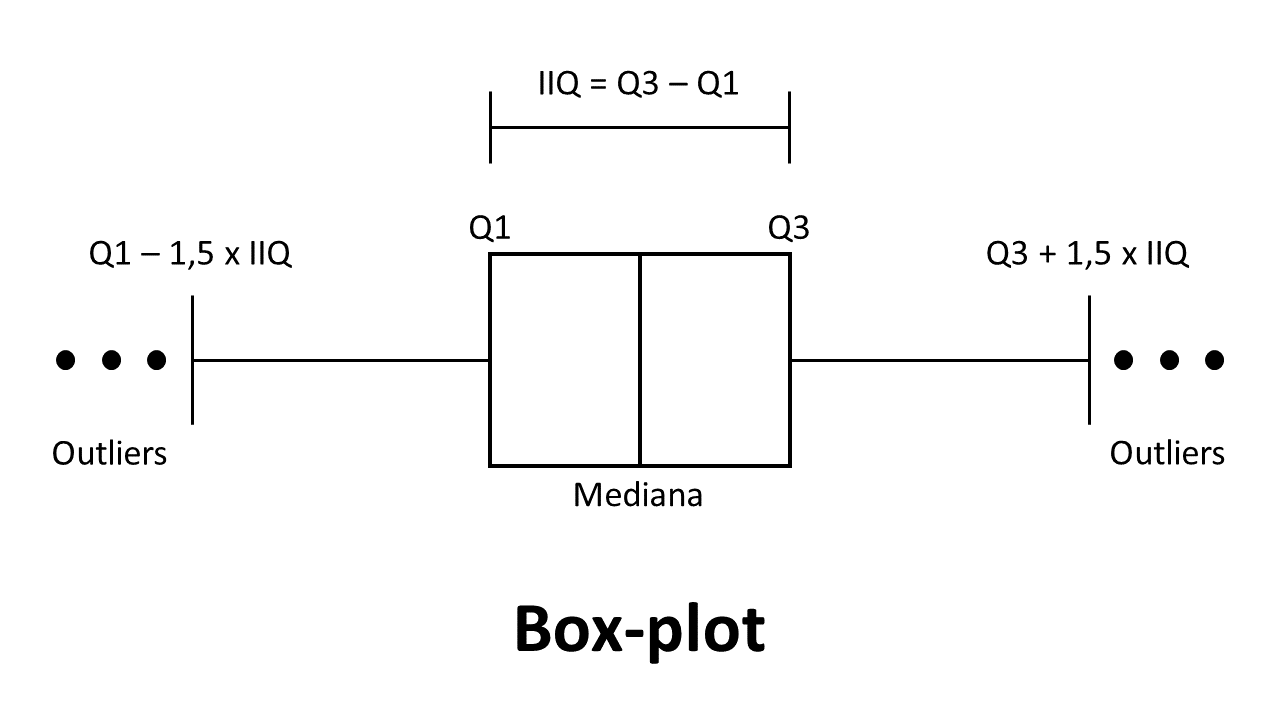

## Box plot da variável *dependente* (X)



<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='$'>

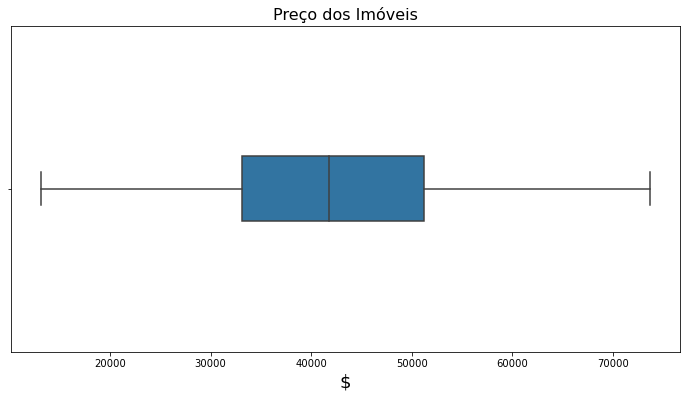

In [22]:
ax = sns.boxplot(dados.precos, orient='h', width=0.2)
ax.figure. set_size_inches(12,6)
ax.set_title('Preço dos Imóveis', fontsize=16)
ax.set_xlabel('$',fontsize=18)
ax


<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Após gerar um Boxplot  da variável dependente não foi identificada a presença de quaisquer valores discrepantes ou outliers. Portanto, podemos afirmar que o dataset não possui dados discrepantes.</li>
    <br>
    <li>Após uma análise cuidadosa do boxplot do conjunto de dados em questão, foi identificada uma leve assimetria à direita. Isso sugere que a distribuição dos dados é ligeiramente desviada para valores mais altos.

Essa informação pode ser útil para compreender melhor a distribuição dos dados e tomar decisões mais precisas em relação à análise e interpretação dos resultados obtidos.</li>
</ul>

## Investigando a variável *dependente* (Y) juntamente com outras característica




### Box-plot (Preço X Garagem)

<AxesSubplot:title={'center':'Preço X Garagem'}, xlabel='Garagem', ylabel='Preços'>

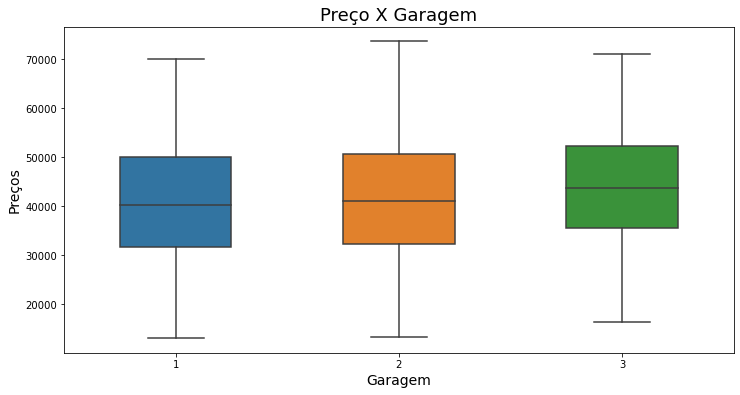

In [23]:
ax = sns.boxplot(x = 'garagem', y = 'precos', data = dados, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço X Garagem', fontsize=18)
ax.set_xlabel('Garagem', fontsize=14)
ax.set_ylabel('Preços', fontsize=14)
ax

### Box-plot (Preço X Banheiros)

<AxesSubplot:title={'center':'Preço X Banheiros'}, xlabel='Banheiros', ylabel='Preços'>

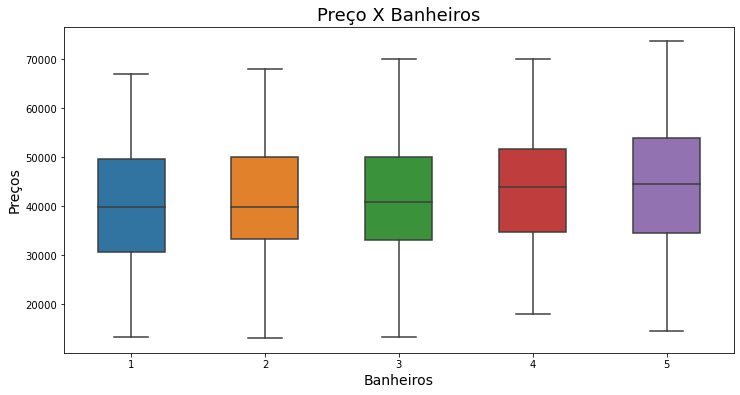

In [24]:
ax = sns.boxplot(x = 'banheiros', y = 'precos', data = dados, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço X Banheiros', fontsize=18)
ax.set_xlabel('Banheiros', fontsize=14)
ax.set_ylabel('Preços', fontsize=14)
ax

### Box-plot (Preço X Lareira)

<AxesSubplot:title={'center':'Preço X Lareira'}, xlabel='Número de Lareiras', ylabel='Preços'>

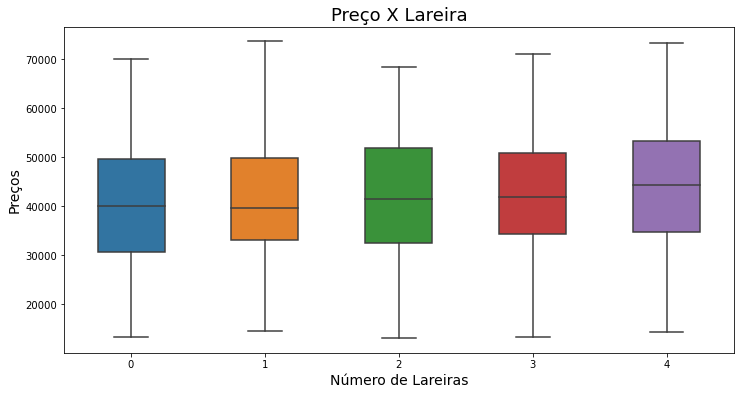

In [25]:
ax = sns.boxplot(x = 'lareira', y = 'precos', data = dados, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço X Lareira', fontsize=18)
ax.set_xlabel('Número de Lareiras', fontsize=14)
ax.set_ylabel('Preços', fontsize=14)
ax

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot:title={'center':'Preço X Acabamento em Mármore'}, xlabel='Mármore Branco', ylabel='Preços'>

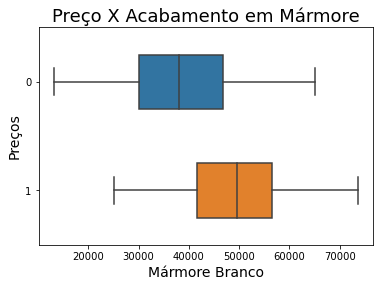

In [26]:
ax = sns.boxplot(x = 'precos', y = 'marmore', data = dados, orient='h', width=0.5)
ax.set_title('Preço X Acabamento em Mármore', fontsize=18)
ax.set_xlabel('Mármore Branco', fontsize=14)
ax.set_ylabel('Preços', fontsize=14)

ax

<li>Após uma análise cuidadosa do boxplot do conjunto de dados em questão, foi identificada uma assimetria à direita significante. Isso significa que o acabamento em mármore é relevante, uma vez que a utilização de materiais nobres como o mármore pode valorizar consideravelmente o imóvel.</li>
<br>
<li>Dessa forma, é possível afirmar que a presença de acabamentos em mármore pode ser um fator determinante para aumentar o valor de venda do imóvel. dados é ligeiramente desviada para valores mais altos.
</li>
</ul>

### Box-plot (Preço X Andares)

<AxesSubplot:title={'center':'Preço X Andares'}, xlabel='Andares', ylabel='Preços'>

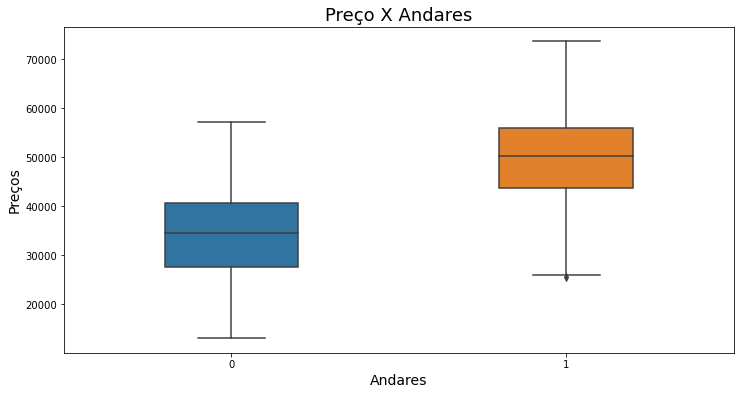

In [27]:
ax = sns.boxplot(x = 'andares', y = 'precos', data = dados, orient='v', width=0.4)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço X Andares', fontsize=18)
ax.set_xlabel('Andares', fontsize=14)
ax.set_ylabel('Preços', fontsize=14)
ax

<li>imóveis com múltiplos andares tendem a ter um valor mais alto. Isso se deve ao fato de que, em geral, imóveis com mais de um andar oferecem mais espaço e conforto para os moradores, além de uma maior privacidade em relação a vizinhos e ruídos externos.</li>
<br>
<li>Além disso, imóveis com mais de um andar também podem apresentar uma maior flexibilidade em termos de layout e utilização de espaço, o que pode ser uma vantagem para quem busca um imóvel com necessidades específicas.</li>

## Distribuição de frequências da variável *dependente* (y)


Text(0.5, 0, '$')

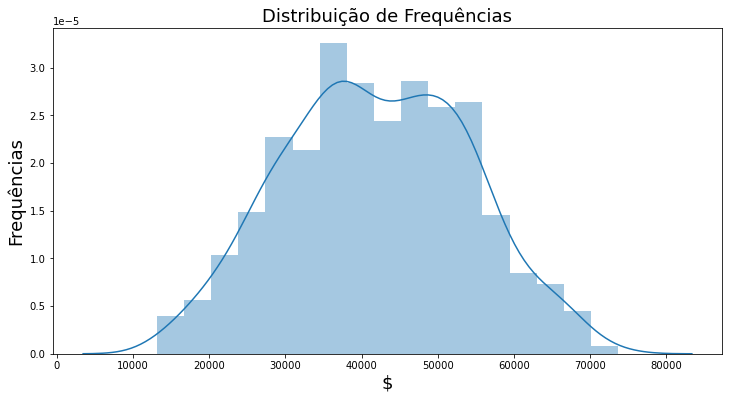

In [28]:
ax = sns.distplot(dados.precos)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=18)
ax.set_ylabel('Frequências', fontsize=18)
ax.set_xlabel('$', fontsize=18)

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y



Text(0.5, 1.2, 'Dispersão entre Variáveis')

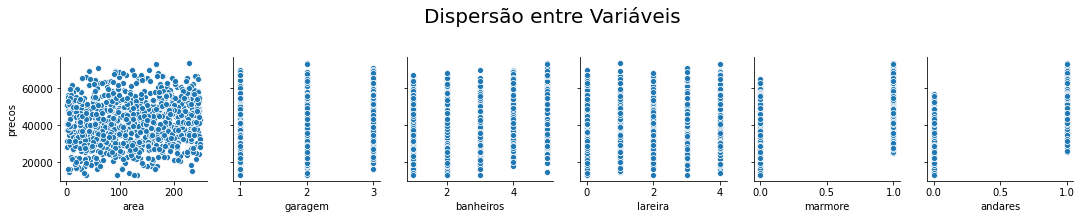

In [29]:
ax = sns.pairplot(dados, y_vars = 'precos', x_vars = ['area', 'garagem', 'banheiros', 'lareira', 'marmore','andares'])
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y = 1.2)

Text(0.5, 1.2, 'Dispersão entre Variáveis')

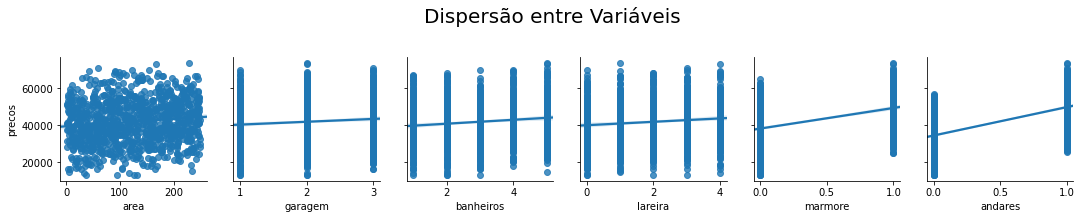

In [30]:
ax = sns.pairplot(dados, y_vars = 'precos', x_vars = ['area', 'garagem', 'banheiros', 'lareira', 'marmore','andares'],
                  kind='reg')
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y = 1.2)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Separando os dados para Teste e Treino.

In [31]:
y = dados.precos

In [32]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore','andares']]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [34]:
modelo = LinearRegression()

## Estimando o modelo linear com os dados de TREINO


In [35]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO


In [36]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


<li>O coeficiente de determinação (R²) para o modelo estimado utilizando os dados de TREINO e o resultado obtido foi de 0.64.</li>
<br>
<li>Esse valor indica que aproximadamente 64% da variação nos dados de TREINO pode ser explicada pelo modelo estimado. Isso sugere que o modelo tem uma boa capacidade de explicar a relação entre as variáveis
</li>

## Gerando previsões para os dados de TESTE



In [37]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo



In [38]:
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

R² = 0.67


<li> O coeficiente de determinação (R²) para as previsões do nosso modelo foi calculado e o resultado obtido foi de 0.67.</li>
<br>
<li>Esse valor indica que aproximadamente 67% da variação nas previsões do modelo pode ser explicada pelas variáveis utilizadas na modelagem. Isso sugere que o modelo tem uma boa capacidade de explicar a relação entre as variáveis e realizar previsões precisas.</li>

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Simulador simples

Simulador que gera estimativas de preço a partir de um conjunto de informações de um imóvel.

In [43]:
area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 46389.80
